<a href="https://colab.research.google.com/github/madhavamk/computational-data-science/blob/master/Assignments/M3_AST_02_Gradient_Descent_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science
## A program by IISc and TalentSprint
### Assignment 2: Gradient Descent

## Learning Objectives

At the end of the experiment, you will be able to

* understand various optimization algorithms
* minimize the value of cost function by finding the minima
* implement gradient descent algorithm and its variations: stochastic, batch and mini-batch gradient descent

In [1]:
#@title Walkthrough Video
from IPython.display import HTML
HTML("""<video width="420" height="240" controls>
<source src="https://cdn.chn.talentsprint.com/content/Gradient_Descent_v1_Debasish_Bhaskar_Updated.mp4">
</video>""")

## Information

#### Optimization:

Optimization consists of procedures that make a system as effective as possible. It is an important tool in decision science and in the analysis of physical systems. To make use of this tool, we must first identify some objective, a quantitative measure of the performance of the system under study. This objective could be profit, time, potential energy, or any quantity or combination of quantities that can be represented by a single number. The objective depends on certain characteristics of the system, called variables or unknowns. Our goal is to find values of the variables that optimize the objective.

* Helps improve the quality of decision-making
* Applications in Engineering, Business, Economics, Science, Military Planning etc.

**Gradient Descent**: It is the most common optimization algorithm in machine learning and deep learning. It is a first-order optimization algorithm. This means it only takes into account the first derivative when performing the updates on the parameters. On each iteration, we update the parameters in the opposite direction of the gradient of the objective function J(w) w.r.t the parameters where the gradient gives the direction of the steepest ascent. The size of the step we take on each iteration to reach the local minimum is determined by the learning rate $α$. Therefore, we follow the direction of the slope downhill until we reach a local minimum (refer to the image below).
![img](https://miro.medium.com/max/700/1*rcmvCjQvsxrJi8Y4HpGcCw.png)

### Setup Steps:

In [2]:
#@title Please enter your registration id to start: { run: "auto", display-mode: "form" }
Id = "" #@param {type:"string"}

In [3]:
#@title Please enter your password (your registered phone number) to continue: { run: "auto", display-mode: "form" }
password = "" #@param {type:"string"}

In [4]:
#@title Run this cell to complete the setup for this Notebook
from IPython import get_ipython

ipython = get_ipython()

notebook= "M3_AST_02_Gradient_Descent_A" #name of the notebook

def setup():
#  ipython.magic("sx pip3 install torch")
    ipython.magic("sx wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/SIMPLEPENDULUMOSCILLATIONDATA.txt")
    from IPython.display import HTML, display
    display(HTML('<script src="https://dashboard.talentsprint.com/aiml/record_ip.html?traineeId={0}&recordId={1}"></script>'.format(getId(),submission_id)))
    print("Setup completed successfully")
    return

def submit_notebook():
    ipython.magic("notebook -e "+ notebook + ".ipynb")

    import requests, json, base64, datetime

    url = "https://dashboard.talentsprint.com/xp/app/save_notebook_attempts"
    if not submission_id:
      data = {"id" : getId(), "notebook" : notebook, "mobile" : getPassword()}
      r = requests.post(url, data = data)
      r = json.loads(r.text)

      if r["status"] == "Success":
          return r["record_id"]
      elif "err" in r:
        print(r["err"])
        return None
      else:
        print ("Something is wrong, the notebook will not be submitted for grading")
        return None

    elif getAnswer() and getComplexity() and getAdditional() and getConcepts() and getComments() and getMentorSupport():
      f = open(notebook + ".ipynb", "rb")
      file_hash = base64.b64encode(f.read())

      data = {"complexity" : Complexity, "additional" :Additional,
              "concepts" : Concepts, "record_id" : submission_id,
              "answer" : Answer, "id" : Id, "file_hash" : file_hash,
              "notebook" : notebook,
              "feedback_experiments_input" : Comments,
              "feedback_mentor_support": Mentor_support}
      r = requests.post(url, data = data)
      r = json.loads(r.text)
      if "err" in r:
        print(r["err"])
        return None
      else:
        print("Your submission is successful.")
        print("Ref Id:", submission_id)
        print("Date of submission: ", r["date"])
        print("Time of submission: ", r["time"])
        print("View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions")
        #print("For any queries/discrepancies, please connect with mentors through the chat icon in LMS dashboard.")
        return submission_id
    else: submission_id


def getAdditional():
  try:
    if not Additional:
      raise NameError
    else:
      return Additional
  except NameError:
    print ("Please answer Additional Question")
    return None

def getComplexity():
  try:
    if not Complexity:
      raise NameError
    else:
      return Complexity
  except NameError:
    print ("Please answer Complexity Question")
    return None

def getConcepts():
  try:
    if not Concepts:
      raise NameError
    else:
      return Concepts
  except NameError:
    print ("Please answer Concepts Question")
    return None


# def getWalkthrough():
#   try:
#     if not Walkthrough:
#       raise NameError
#     else:
#       return Walkthrough
#   except NameError:
#     print ("Please answer Walkthrough Question")
#     return None

def getComments():
  try:
    if not Comments:
      raise NameError
    else:
      return Comments
  except NameError:
    print ("Please answer Comments Question")
    return None


def getMentorSupport():
  try:
    if not Mentor_support:
      raise NameError
    else:
      return Mentor_support
  except NameError:
    print ("Please answer Mentor support Question")
    return None

def getAnswer():
  try:
    if not Answer:
      raise NameError
    else:
      return Answer
  except NameError:
    print ("Please answer Question")
    return None


def getId():
  try:
    return Id if Id else None
  except NameError:
    return None

def getPassword():
  try:
    return password if password else None
  except NameError:
    return None

submission_id = None
### Setup
if getPassword() and getId():
  submission_id = submit_notebook()
  if submission_id:
    setup()
else:
  print ("Please complete Id and Password cells before running setup")



Setup completed successfully


#### Importing required packages

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.optimize as opt
import pandas as pd

### Optimization

 First, let's define a simple mathematical function (the opposite of the cardinal sine). This function has many local minima but a single global minimum.

 Refer the [link](https://www.mathworks.com/help/signal/gs/the-sinc-function.html) for more information on the below function.

In [6]:
# function f
def f(x):
    return 1 - np.sin(x) / x

Let's plot this function in the interval [−20,20] (with 1000 samples)

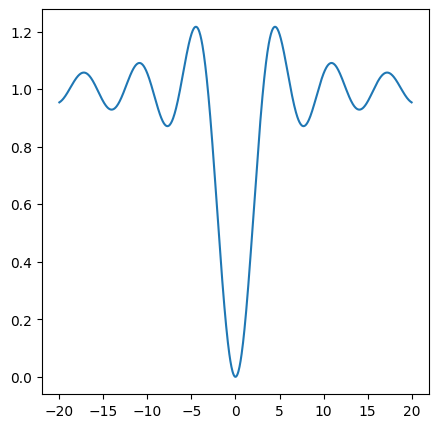

In [7]:
# create an array and apply the function
x = np.linspace(-20., 20., 1000)
y = f(x)
# visualize the plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)

The `scipy.optimize` module comes with many function minimization routines. The `minimize()` function offers a unified interface to many algorithms. The Broyden-Fletcher-Goldfarb-Shanno (BFGS) algorithm (the default algorithm in `minimize()`) gives good results in general. The `minimize()` function requires an initial point as argument. For scalar univariate functions, we can also use `minimize_scalar()`

In [8]:
# optimize
x0 = 3
xmin = opt.minimize(f, x0).x

Starting from x0=3, the algorithm was able to find the actual global minimum, as shown in the following figure

(-20.0, 20.0)

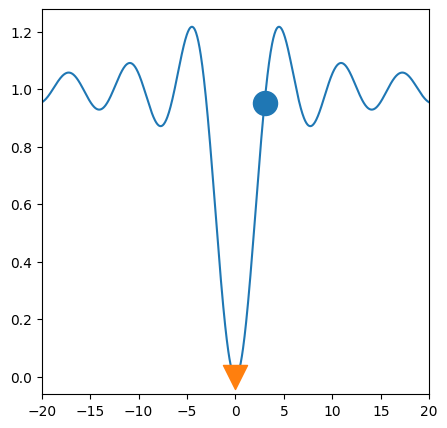

In [9]:
# visualize
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

Now, if we start from an initial point that is farther away from the actual global minimum, the algorithm converges towards a local minimum only

In [10]:
# opitmize from initial point
x0 = 10
# YOUR CODE HERE for xmin
xmin = opt.minimize(f,x0).x

(-20.0, 20.0)

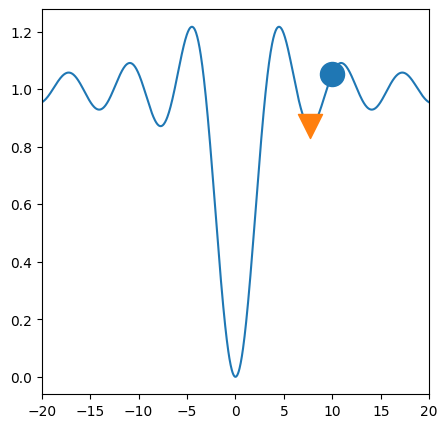

In [11]:
# visualize
# YOUR CODE HERE to plot
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.plot(x, y)
ax.scatter(x0, f(x0), marker='o', s=300)
ax.scatter(xmin, f(xmin), marker='v', s=300, zorder=20)
ax.set_xlim(-20, 20)

## Gradient descent
Gradient descent is an optimization algorithm to find the minimum of a function. We start with a random point on the function and move in the negative direction of the gradient of the function to reach the local/global minima.

Gradient descent is the backbone of a machine learning algorithm.

### Example: Find the local minima of the function $y=(x+5$)$^2$ starting from the point $x=3$

<img src="https://cdn.iisc.talentsprint.com/CDS/Images/convex_curve.png" width = "350px;"/>


By observing the above plot, we know that $y = (x+5)^2$ reaches it’s minimum value when x = -5 (i.e when x=-5, y=0).

Hence x=-5 is the local and global minima of the function.

Now we will see how to obtain the same numerically, using gradient descent.

**Step 1 :** Initialize x =3. Find the gradient of the function, dy/dx = 2*(x+5).

**Step 2 :** Move in the direction of the negative of the gradient. The learning rate determines how many steps to move. Let us assume the learning rate is 0.01

**Step 3 :** Perform 2 iterations of gradient descent

The parameter update formula in gradient descent is:

$ x_{new} = x_{old} - (learning\ rate * (dy/dx))$,

- where $dy/dx$ is the derivative of the function with respect to a single weight, done for all the weights

<img src="https://cdn.iisc.talentsprint.com/CDS/Images/GD_iterations.png" width ="480px;"/>

**Step 4 :** We can observe that the X value is slowly decreasing and should converge to -5 (the local minima). However, how many iterations should we perform?

We can set a precision variable in our algorithm which calculates the difference between two consecutive “x” values. If the difference between x values from 2 consecutive iterations is lesser than the precision we set, stop the algorithm!

### We can solve the above optimization problem by implementing the gradient descent algorithm in Python:

In [12]:
# Step 1 : Initialize parameters

cur_x = 3                   # The algorithm starts at x=3
rate = 0.01                 # Learning rate
precision = 0.0001          # This tells us when to stop the algorithm
previous_step_size = 1      # Limit to monitor change in x
max_iters = 10000           # maximum number of iterations
iters = 0                   # iteration counter
df = lambda x: 2*(x+5)      # Gradient of our function

In [14]:
# Step 2 : Run a loop to perform gradient descent:
# i. Stop loop when difference between x values from last 2 consecutive iterations is less than 0.0001 or when number of iterations exceeds 10,000

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x                                     # Store current x value in prev_x
    cur_x = cur_x - rate * df(prev_x)                  # Grad descent
    previous_step_size = abs(cur_x - prev_x)           # Change in x
    iters = iters+1                                    # iteration count
    print("Iteration", iters, "\nX value is", cur_x)   # Print iterations

print("The local minimum occurs at", cur_x)

The local minimum occurs at -4.995179858737854


From the above output we can observe the $x$ values after each iteration and the optimized solution. The $x$ values from the first 2 iterations can be cross checked with our earlier manual calculation.

###Solving a linear regression problem with Gradient descent

Here, we consider a simple pendulum oscillation dataset with two variables. The dataset consists of two columns and 89 rows. Each column represents a characteristic of a simple pendulum i.e l (length) and t (time period). The dataset describes the relationship between the l and t which is $L∝T^2$ .

In [16]:
# Load the data by using pandas read_csv()
data = pd.read_csv("SIMPLEPENDULUMOSCILLATIONDATA.txt", sep=" ", header=None, names=['l', 't'])
# YOUR CODE HERE to show few rows of data
data.head()

,l,t
0,0.10,0.69004
1,0.11,0.69497
2,0.12,0.74252
3,0.13,0.75360
4,0.14,0.83568


In [17]:
# Get the length and time period values from the dataset
l = data['l'].values
# YOUR CODE HERE to create 't'
t = data['t'].values
# Get the square of time period
tsq = t * t

### Batch Gradient Descent

Batch Gradient Descent is when we sum up over all examples on each iteration when performing the updates to the parameters. Therefore, for each update, we have to sum over all examples:

$$w = w - \alpha \triangledown_w J(w)$$

The below function `train()` updates the values of $m$ and $c$ in the linear regression equation $y = mx + c$, and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized error are returned.

In [18]:
# function to update m and c
def train(x, y, m, c, eta):                   # x = independent variable, y = dependent variable, m = coeff. of independent var (slope), c = constant (bias), eta = learning rate
    const = - 2.0/len(y)                      # constant term to be used in compting gradients
    ycalc = m * x + c                         # linear regression expression
    delta_m = const * sum(x * (y - ycalc))    # dy/dm
    delta_c = const * sum(y - ycalc)          # dy/dc
    m = m - delta_m * eta                     # gradient descent step to update m
    c = c - delta_c * eta                     # gradient descent step to update c
    error = sum((y - ycalc)**2)/len(y)        # error
    return m, c, error

Let us vary the learning rate and find how the error decreases in each case, and how the final line looks, by training each case for the same number of iterations - 2000.

In [19]:
# Save errors
errs_1 = []
m, c = 0, 0         # initial guess
eta = 0.1           # learning rate

# Call the train() method for 2000 iterations to update m and c and get error value with eta = 0.1
for iteration in range(2000):
    m, c, error = train(l, tsq, m, c, eta)
    errs_1.append(error)

# Save final line
m_1, c_1 = m, c
m_1, c_1

(4.1414844631045575, 0.07358041685220443)

Visualize the function

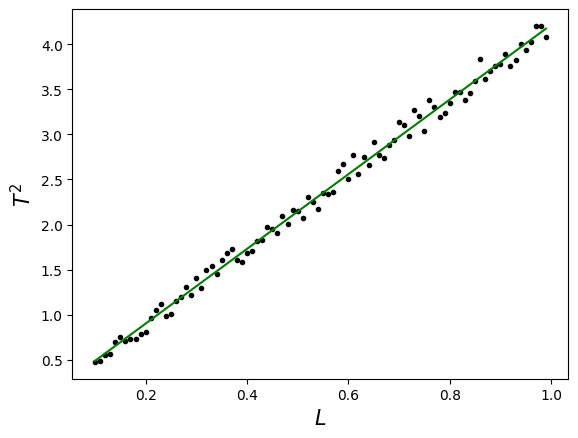

In [20]:
# Find the lines
y_1 = m_1 * l + c_1
plt.plot(l, tsq, '.k');
plt.plot(l, y_1, "g");
plt.xlabel("$L$", fontsize=15)
plt.ylabel("$T^2$", fontsize=15)
plt.show()

### Stochastic gradient descent:

Instead of going through all examples, Stochastic Gradient Descent (SGD) performs the parameters update on each example $(x_i,y_i)$. Therefore, learning happens on every example:
$$w = w - \alpha \triangledown_w J(x_i,y_i;w)$$

given the equation $y_i = mx_i + c$

we calculate the error as $E$ = $(y - y_i)^2$ ; where $y$ is the ground truth and $y_i$ is the prediction

Finding the rate of change in error with respect to m is $\frac{\partial E_i }{\partial m}$ = $ -2(y_i - (mx_i + c)) * x_i$

rate of change in c is $\frac{\partial E_i }{\partial c}$ = $ -2(y_i - (mx_i + c))$

And then we update the slope and bias with change in slope $\Delta m$ and change in bias $\Delta c$ with learning rate $eta$

$m$  = $m - \Delta m * eta$

$c$  = $c - \Delta c * eta$

The below function `next_step()` updates the values of m and c and calculates error. The loss is minimized due to the changed values of m and c. The new values m, c and the minimized loss are returned.

In [22]:
# change in m and c
def next_step(x, y, m, c, eta):
    ycalc = m * x + c                # linear regression expression
    error = (y - ycalc) ** 2         # error
    delta_m = -(y - ycalc) * x       # dy/dm
    # YOUR CODE HERE to create 'delta_c'         # dy/dc
    delta_c = -(y - ycalc)
    m = m - delta_m * eta            # gradient descent step to update m
    # YOUR CODE HERE to update 'c'     # gradient descent step to update c
    c = c - delta_c * eta
    return m, c, error

The function below takes a random data point at a time and updates m and c using the function `next_step()`

In [23]:
# update m and c for one data point
def one_loop_random(x, y, m, c, eta):
    # Making random idx
    random_idx = np.arange(len(y))
    np.random.shuffle(random_idx)
    # Training with random idx
    for idx in random_idx:
        m, c, e = next_step(x[idx], y[idx], m, c, eta)
        #print(m, c, e)
    return m,c,e

The function below trains the data for 1000 iterations. In each iteration it calls the `one_loop_random()` function.

In [24]:
# train for 1000 iterations
def train_stochastic(x, y, m, c, eta, iterations=1000):
    for iteration in range(iterations):
        m, c, err = one_loop_random(x, y, m, c, eta)
    return m, c, err

In [27]:
# Initialize m, c
m, c = 0, 0
# YOUR CODE HERE to create m and c
# Learning rate
lr = 0.001

m = 2.20149 c = 1.18807 Error = 0.586523
m = 2.92035 c = 0.775168 Error = 0.0207445
m = 3.37276 c = 0.515108 Error = 0.0648665
m = 3.65762 c = 0.35156 Error = 0.00240502
m = 3.83691 c = 0.248565 Error = 0.00183683
m = 3.94979 c = 0.183769 Error = 0.00687024
m = 4.02079 c = 0.142905 Error = 0.00952236
m = 4.06548 c = 0.117157 Error = 0.00662003
m = 4.09361 c = 0.100961 Error = 0.00285927
m = 4.11137 c = 0.0908533 Error = 0.000668782


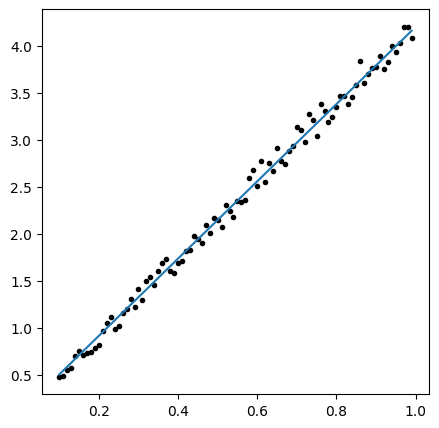

In [28]:
# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for num in range(10):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c

# YOUR CODE HERE to plot data point and regression line
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(l, tsq, '.k')
ax.plot(l, y)

Plot Errors vs Iterations

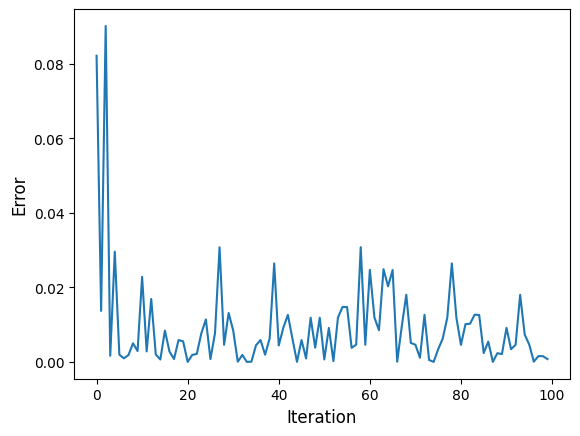

In [29]:
ms, cs, errs = [], [], []
m, c = 0, 0
lr = 0.001

# Call the train_stochastic() method to update m and c and get error value with lr = 0.001.
for times in range(100):
    m, c, error = train_stochastic(l, tsq, m, c, lr, iterations=100) # We will plot the error values for every 100 iterations
    ms.append(m)
    cs.append(c)
    errs.append(error)
plt.plot(range(100), errs);
plt.xlabel("Iteration", fontsize=12)
plt.ylabel("Error", fontsize=12)
plt.show()

### Minibatch Gradient Descent

In Mini-Batch Gradient Descent algorithm, rather than using  the complete data set, in every iteration we use a subset of training examples (called "batch") to compute the gradient of the cost function.

Common mini-batch sizes range between 50 and 256, but can vary for different applications.







Below is a graph that shows the gradient descent’s variants and their direction towards the minimum:
![img3](https://miro.medium.com/max/700/1*PV-fcUsNlD9EgTIc61h-Ig.png)

`train_one_batch()` : we will be calculating the essential parts of the Gradient Descent method:

We assume there are $n$ samples in a batch $B$, for all  $i \in B$,

$y_i = mx_i + c$
        
$E$ =$\frac{1}{n}$   $\sum_{i=1}^n (y - y_i)^2$

$\frac{\partial E }{\partial m}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -x_i(y - (mx_i + c))$

$\frac{\partial E}{\partial c}$ = $\frac{2}{n}$   $\sum_{i=1}^n  -(y - (mx_i + c))$

`train_batches()` : We will be splitting our data into batches.

In [30]:
"""
The function 'train_one_batch()' updates the values of m and c and calculates error.
The loss is minimized due to the changed values of m and c.
The new values m, c and the minimized loss are returned.
"""
def train_one_batch(x, y, m, c, eta):
    const = - 2.0/len(y)
    ycalc = m * x + c                             # linear regression expression
    delta_m = const * sum(x * (y - ycalc))        # dy/dm
    # YOUR CODE HERE to create 'delta_c'          # dy/dc
    delta_c = const * sum(y - ycalc)
    m = m - delta_m * eta                         # gradient descent step to update m
    # YOUR CODE HERE to update 'c'                # gradient descent step to update c
    c = c - delta_c * eta
    error = sum((y - ycalc)**2)/len(y)            # error
    return m, c, error

"""
The function below takes a batch_size and loss is calculated w.r.t batches.
The batches are created using random index.
The m, c and error values are calculated for each batch of data.
So, it calls the function 'train_one_batch()' by passing batch_x, batch_y for each batch.
"""
def train_batches(x, y, m, c, eta, batch_size):
    # Making the batches
    random_idx = np.arange(len(y))
    # YOUR CODE HERE to randomly shuffle 'random_idx'
    np.random.shuffle(random_idx)

    # Train each batch
    for batch in range(len(y)//batch_size):
        batch_idx = random_idx[batch*batch_size:(batch + 1)*batch_size]
        batch_x = x[batch_idx]
        batch_y = y[batch_idx]
        m, c, err = train_one_batch(batch_x, batch_y, m, c, eta)

    return m, c, err

"""
The function below trains the data for 1000 iterations.
The data is traversed in batches, the batch size here is considered to be 10.
In each iteration it calls the 'train_batches' function.
The 'batch_size' is passed as a parameter to 'train_batches'.
"""
def train_minibatch(x, y, m, c, eta, batch_size=10, iterations=1000):
    for iteration in range(iterations):
        m, c, err = train_batches(x, y, m, c, eta, batch_size)
    return m, c, err

#### Train the Minibatch gradient descent

In [31]:
# Initializing m, c
m, c = 0, 0
# Learning rate
lr = 0.001

In [32]:
# Training for 1000 iterations, plotting after every 100 iterations:

# Call the train_minibatch() method to update m and c and get error value with lr = 0.001 and batch_size=90.
for num in range(10):
    # We will plot the error values for every 100 iterations
    m, c, error = train_minibatch(l, tsq, m, c, lr, batch_size=90, iterations=100)
    print("m = {0:.6} c = {1:.6} Error = {2:.6}".format(m, c, error))
    y = m * l + c

m = 0.276529 c = 0.408341 Error = 4.1726
m = 0.49608 c = 0.718257 Error = 2.71618
m = 0.671759 c = 0.952549 Error = 1.8504
m = 0.813639 c = 1.12874 Error = 1.33379
m = 0.929467 c = 1.26031 Error = 1.02365
m = 1.0252 c = 1.35762 Error = 0.835624
m = 1.10541 c = 1.42863 Error = 0.719865
m = 1.17362 c = 1.47945 Error = 0.646911
m = 1.23254 c = 1.51479 Error = 0.599347
m = 1.28426 c = 1.53828 Error = 0.566879


Visualization of line plot using minibatch gradient descent

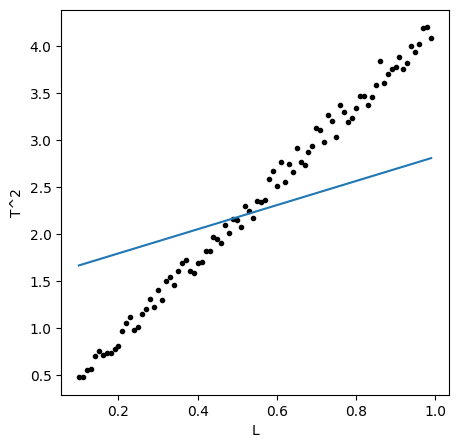

In [34]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)
ax.plot(l, tsq, '.k')
ax.plot(l, y)
# YOUR CODE HERE for labels
ax.set_xlabel('L')
ax.set_ylabel('T^2')
plt.show()

**Ungraded Exercise:** Experiment with other lr values.

In [ ]:
# YOUR CODE HERE

**Ungraded Exercise:** Experiment with other batch_size values.

In [ ]:
# YOUR CODE HERE

**Comparison of gradient descent variants**

![img](https://cdn.iisc.talentsprint.com/CDS/Images/Gradient_descent_variants_comparison.JPG)

To know more about gradient descent variants, click [here](https://cdn.iisc.talentsprint.com/CDS/Assignments/Module2/M2_AST_02_Gradient_Descent_Demystifying%20Different%20Variants%20of%20Gradient%20Descent%20Optimization%20Algorithm.pdf)

### Ungraded Question

**Question1 :** Determine the gradient of the function $x^2 - 2y^2 - 4y + 6$ at point (0, 0)?


**Solution:** ∇f = 0i − 4j

Explanation: At point (0,0), we calculate the gradient at this point as

∂f/∂x = 2x = 2(0) = 0

∂f/∂y = −4y − 4 = −4(0) − 4 = −4

which are used to determine the gradient as ∇f = 0i − 4j

### Please answer the questions below to complete the experiment:




In [35]:
#@title Mark the following statement as True or False: Gradient descent always successfully finds the global minima { run: "auto", form-width: "500px", display-mode: "form" }
Answer = "False" #@param ["","True","False"]


In [36]:
#@title How was the experiment? { run: "auto", form-width: "500px", display-mode: "form" }
Complexity = "Good and Challenging for me" #@param ["","Too Simple, I am wasting time", "Good, But Not Challenging for me", "Good and Challenging for me", "Was Tough, but I did it", "Too Difficult for me"]


In [37]:
#@title If it was too easy, what more would you have liked to be added? If it was very difficult, what would you have liked to have been removed? { run: "auto", display-mode: "form" }
Additional = "na" #@param {type:"string"}


In [38]:
#@title Can you identify the concepts from the lecture which this experiment covered? { run: "auto", vertical-output: true, display-mode: "form" }
Concepts = "Yes" #@param ["","Yes", "No"]


In [39]:
#@title  Text and image description/explanation and code comments within the experiment: { run: "auto", vertical-output: true, display-mode: "form" }
Comments = "Very Useful" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [40]:
#@title Mentor Support: { run: "auto", vertical-output: true, display-mode: "form" }
Mentor_support = "Didn't use" #@param ["","Very Useful", "Somewhat Useful", "Not Useful", "Didn't use"]


In [41]:
#@title Run this cell to submit your notebook for grading { vertical-output: true }
try:
  if submission_id:
      return_id = submit_notebook()
      if return_id : submission_id = return_id
  else:
      print("Please complete the setup first.")
except NameError:
  print ("Please complete the setup first.")

Your submission is successful.
Ref Id: 2440
Date of submission:  13 Jul 2024
Time of submission:  23:03:19
View your submissions: https://cds-iisc.talentsprint.com/notebook_submissions
